<a href="https://colab.research.google.com/github/anamunoz01/PROYECTO-INTEGRADOR-III/blob/main/ClasBinaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MODELO PREDICTIVO DE ATAQUES AL CORAZÓN CON REDES NEURONALES** 

**Proyecto Integrador III**

- Elena Gómez

- Ana Muñoz

- Inés Sánchez

- Miriam Toledo


## **Objetivo**

Vamos a predecir la posibilidad de sufrir un ataque al corazón dependiendo de diferentes características relacionadas con la salud del paciente.  

Para ello creamos un modelo de clasificación binaria, con el que obtendremos una salida que será 0 o 1.
- 0 significará que la probabilidad de sufrir un ataque al corazón es muy baja.
-1 será el caso contrario, es decir, que la probabilidad es alta.

La base de datos que utilizaremos la encontramos en kaggle.com, como Health care: Heart attack possibility. 

Las características que vamos a estudiar son las siguientes:
1. Edad
2. Sexo
3. Tipo de dolor de pecho (4 tipos)
4. Presión en sangre
5. Colesterol en mg/dl
6. Azúcar en sangre > 120 mg/dl
7. Resultado electrocardiograma (valores 0, 1, 2)
8. Frecuencia cardiaca máxima alcanzada
9. Angina de pecho (inducida por el ejercicio)
10. Depresión del ST inducida por el ejercicio en relación con el reposo
11. La pendiente del segmento ST máximo del ejercicio
12. Número de vasos mayores (0-3) coloreados por la fluoroscopia
13. thal: 0 = normal; 1 = defecto fijo; 2 = defecto reversible
14. objetivo: 0= menos posibilidades de infarto 1= más posibilidades de infarto

**Estudio y análisis de datos**

In [1]:
import keras
keras.__version__

'2.8.0'

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('dataset heart attack.xlsx')


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


GRAFICAS

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

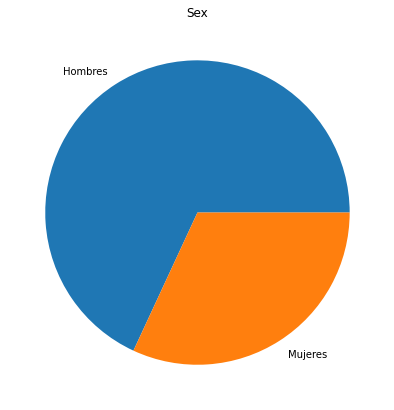

In [5]:
grupos = ['Hombres', 'Mujeres']
data = [ 207, 97]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('Sex')
plt.show()


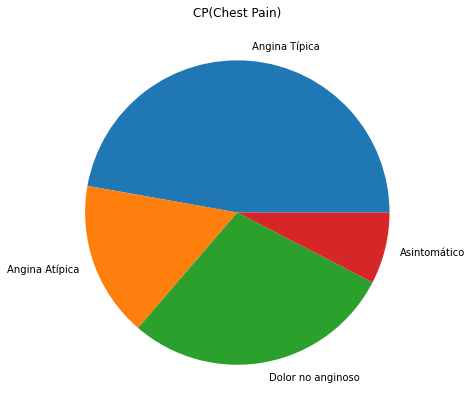

In [6]:
grupos = ['Angina Típica', 'Angina Atípica', 'Dolor no anginoso', 'Asintomático']
data = [ 143,50,87,23]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('CP(Chest Pain)')
plt.show()

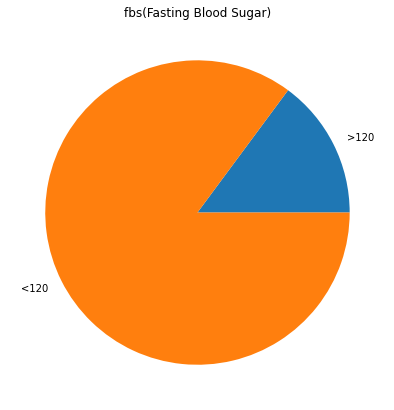

In [7]:
grupos = ['>120', '<120']
data = [ 45, 258]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('fbs(Fasting Blood Sugar)')
plt.show()

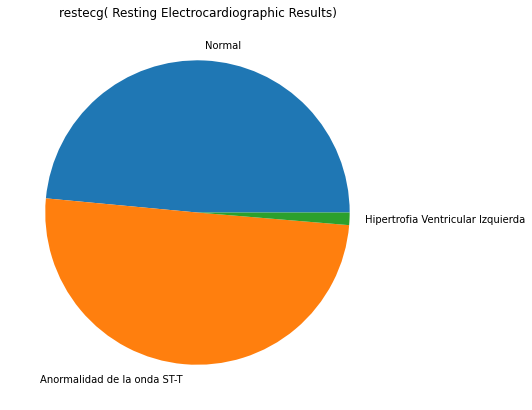

In [8]:
grupos = ['Normal', 'Anormalidad de la onda ST-T', 'Hipertrofia Ventricular Izquierda']
data = [ 147, 152, 4]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('restecg( Resting Electrocardiographic Results)')
plt.show()

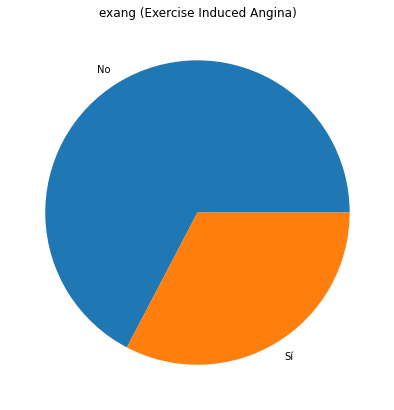

In [9]:
grupos = ['No', 'Sí']
data = [ 204, 99]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('exang (Exercise Induced Angina)')
plt.show()

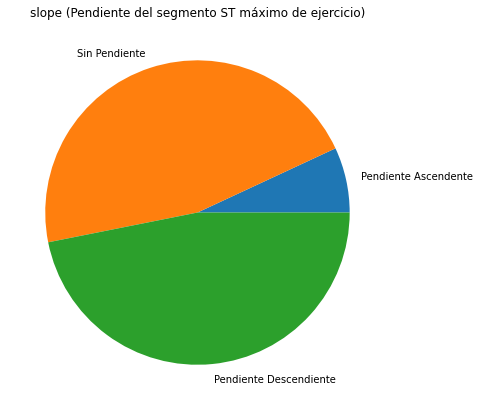

In [10]:
grupos = ['Pendiente Ascendente', 'Sin Pendiente', 'Pendiente Descendiente']
data = [21, 140, 142]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('slope (Pendiente del segmento ST máximo de ejercicio)')
plt.show()

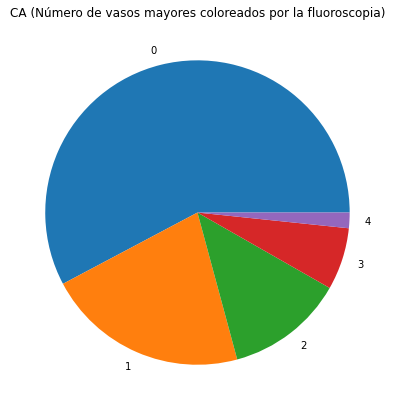

In [11]:
grupos = ['0', '1', '2', '3', '4']
data = [175, 65, 38, 20, 5]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('CA (Número de vasos mayores coloreados por la fluoroscopia)')
plt.show()

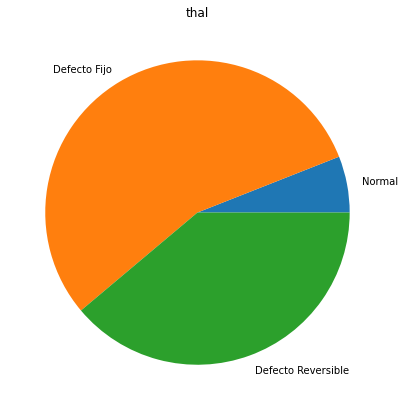

In [12]:
grupos = ['Normal', 'Defecto Fijo', 'Defecto Reversible']
data = [18, 166, 117]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('thal')
plt.show()

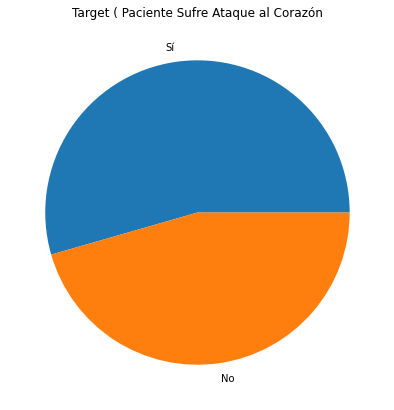

In [13]:
grupos = ['Sí', 'No']
data = [165, 138]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = grupos)
plt.title('Target ( Paciente Sufre Ataque al Corazón')
plt.show()

Creamos dos dataframes nuevos separando variables numéricas de categóricas 

In [14]:
continuas = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
continuas

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


Normalizamos las continuas

In [15]:
mean = continuas.mean(axis=0)
#print(mean)
#continuas -= mean
std = continuas.std(axis=0)
#print(std)
continuas /= std

continuas

,age,trestbps,chol,thalach,oldpeak
0,6.936721,8.267694,4.495401,6.548742,1.980923
1,4.073947,7.412415,4.823391,8.164099,3.014448
2,4.514374,7.412415,3.935887,7.509225,1.205779
3,6.165974,6.842230,4.553282,7.771174,0.689017
4,6.276081,6.842230,6.829922,7.116300,0.516762
...,...,...,...,...,...
298,6.276081,7.982601,4.649749,5.369969,0.172254
299,4.954801,6.272044,5.093501,5.762893,1.033525
300,7.487254,8.210676,3.723658,6.155818,2.928321
301,6.276081,7.412415,2.527457,5.020703,1.033525


In [16]:
clases = df[['sex', 'fbs', 'exang', 'cp', 'restecg', 'slope', 'ca', 'thal']]
clases

,sex,fbs,exang,cp,restecg,slope,ca,thal
0,1,1,0,3,0,0,0,1
1,1,0,0,2,1,0,0,2
2,0,0,0,1,0,2,0,2
3,1,0,0,1,1,2,0,2
4,0,0,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,1,0,1,1,0,3
299,1,0,0,3,1,1,0,3
300,1,1,0,0,1,1,2,3
301,1,0,1,0,1,1,1,3


Vectorizamos las variables categóricas y las unimos al dataframe con las variables continuas ya normalizadas

In [17]:

normalizado = continuas
for i in clases:
  y = pd.get_dummies(df[i] ,prefix = i)
  #print(y)
  normalizado = normalizado.join(y)


normalizado = normalizado.join(df['target'])
normalizado 

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,fbs_0,fbs_1,exang_0,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
0,6.936721,8.267694,4.495401,6.548742,1.980923,0,1,0,1,1,...,1,0,0,0,0,0,1,0,0,1
1,4.073947,7.412415,4.823391,8.164099,3.014448,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,1
2,4.514374,7.412415,3.935887,7.509225,1.205779,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
3,6.165974,6.842230,4.553282,7.771174,0.689017,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,1
4,6.276081,6.842230,6.829922,7.116300,0.516762,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,6.276081,7.982601,4.649749,5.369969,0.172254,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
299,4.954801,6.272044,5.093501,5.762893,1.033525,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
300,7.487254,8.210676,3.723658,6.155818,2.928321,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,0
301,6.276081,7.412415,2.527457,5.020703,1.033525,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [18]:
from keras.utils.np_utils import to_categorical

In [19]:
train_data = normalizado.sample(frac=0.8,random_state=0)
# El resto de datos los almacenamos en test_data:
test_data = normalizado.drop(train_data.index)

In [ ]:
train_data

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,fbs_0,fbs_1,exang_0,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
225,7.707468,8.267694,3.357080,5.457285,2.239304,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
152,7.046828,9.693159,4.379639,6.767034,0.516762,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,1
228,6.496294,9.693159,5.556547,6.941667,0.172254,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
201,6.606401,7.127323,4.977740,6.155818,2.411558,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
52,6.826614,7.412415,4.456814,6.374109,1.550287,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,6.606401,5.815895,6.135354,6.985325,0.000000,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,1
285,5.064907,7.982601,6.000299,5.238994,1.550287,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
11,5.285121,7.412415,5.305731,6.068501,0.172254,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
119,5.064907,7.868564,4.688336,6.636059,0.000000,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [20]:
train_labels = train_data.pop('target')
test_labels = test_data.pop('target')

Creamos la red

In [21]:
import tensorflow as tf

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

DATOS VALIDACION

In [22]:
x_val = train_data[:160]
partial_x_train = train_data[160:]

y_val = train_labels[:160]
partial_y_train = train_labels[160:]

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=40,   #con 60 accuracy tdo el rato 4146  (epochs = 20)
                    validation_data=(x_val, y_val))

Epoch 1/50
3/3 [==============================] - 1s 205ms/step - loss: 0.8402 - accuracy: 0.2195 - val_loss: 0.7559 - val_accuracy: 0.4375
Epoch 2/50
3/3 [==============================] - 0s 30ms/step - loss: 0.7665 - accuracy: 0.4634 - val_loss: 0.7333 - val_accuracy: 0.4500
Epoch 3/50
3/3 [==============================] - 0s 34ms/step - loss: 0.7484 - accuracy: 0.4634 - val_loss: 0.7345 - val_accuracy: 0.5312
Epoch 4/50
3/3 [==============================] - 0s 32ms/step - loss: 0.7381 - accuracy: 0.5610 - val_loss: 0.7369 - val_accuracy: 0.5437
Epoch 5/50
3/3 [==============================] - 0s 32ms/step - loss: 0.7334 - accuracy: 0.5732 - val_loss: 0.7374 - val_accuracy: 0.5437
Epoch 6/50
3/3 [==============================] - 0s 50ms/step - loss: 0.7291 - accuracy: 0.5732 - val_loss: 0.7123 - val_accuracy: 0.5437
Epoch 7/50
3/3 [==============================] - 0s 31ms/step - loss: 0.7084 - accuracy: 0.5732 - val_loss: 0.6905 - val_accuracy: 0.5437
Epoch 8/50
3/3 [==========

Graficamos datos obtenidos

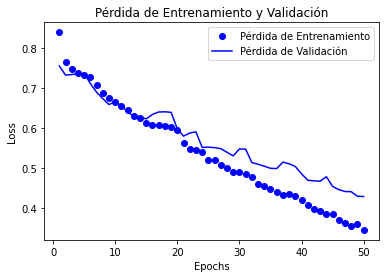

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

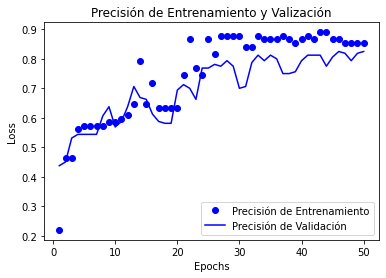

In [25]:
plt.clf()   # Limpia la figura
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Creamos una nueva 

In [26]:
model2 = models.Sequential()
# Entrada, un tensor con la crítica vectorizada (10000 valores)
model2.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model2.fit(train_data,
                    train_labels,
                    epochs=30,
                    batch_size=40, )

Epoch 1/30
7/7 [==============================] - 1s 3ms/step - loss: 0.9008 - accuracy: 0.5537
Epoch 2/30
7/7 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.5992
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.6033
Epoch 4/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6287 - accuracy: 0.6529
Epoch 5/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6109 - accuracy: 0.6777
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.7231
Epoch 7/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.7397
Epoch 8/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7521
Epoch 9/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7727
Epoch 10/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7686
Epoch 11/30
7/7 [======================

In [29]:
results = model2.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 7ms/step - loss: 0.4914 - accuracy: 0.8033


MATRIZ DE CONFUSIÓN

In [30]:
#import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [31]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from keras.utils.np_utils import to_categorical

Según UCI Machine Learning Repository a partir de 0.5 se considera riesgo de sufrir un ataque al corazón .


In [34]:
predicciones = model2.predict(test_data)
predicciones

# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion


[[0.42457458]
 [0.9253824 ]
 [0.9210806 ]
 [0.9685259 ]
 [0.9805003 ]
 [0.59181046]
 [0.9359367 ]
 [0.67415047]
 [0.98880124]
 [0.9910392 ]
 [0.09221041]
 [0.9715962 ]
 [0.8307078 ]
 [0.87275076]
 [0.8285321 ]
 [0.605932  ]
 [0.90958846]
 [0.34921736]
 [0.90766823]
 [0.8476523 ]
 [0.91692793]
 [0.85814387]
 [0.98309386]
 [0.25867888]
 [0.42087507]
 [0.97066814]
 [0.86821866]
 [0.9789331 ]
 [0.98119015]
 [0.5288471 ]
 [0.92107743]
 [0.19856542]
 [0.03620356]
 [0.7303576 ]
 [0.02290103]
 [0.991526  ]
 [0.07091683]
 [0.760316  ]
 [0.16493568]
 [0.08214802]
 [0.02132142]
 [0.07153064]
 [0.16930601]
 [0.5833329 ]
 [0.02156472]
 [0.1448093 ]
 [0.04022968]
 [0.13153866]
 [0.04137045]
 [0.07265279]
 [0.07799625]
 [0.46591383]
 [0.785391  ]
 [0.45262825]
 [0.420959  ]
 [0.928283  ]
 [0.9697418 ]
 [0.22862372]
 [0.04837531]
 [0.03712502]
 [0.02281731]]


array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

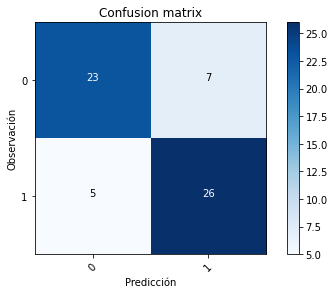

In [35]:
#Y_pred2 = model2.predict(test_data)
#Y_pred_classes2 = np.argmax(Y_pred2, axis = 1) 
#Y_true2 = np.argmax(test_labels, axis = 1) 
ytrue = test_labels.tolist()
#yhat = yhat.tolist()
confusion_mtx2 = confusion_matrix(ytrue, clasificacion) 
plot_confusion_matrix(confusion_mtx2, classes = range(2))

modelo con adam

In [43]:
model3 = models.Sequential()
# Entrada, un tensor con la crítica vectorizada (10000 valores)
model3.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
history = model3.fit(train_data,
                    train_labels,
                    epochs=30,
                    batch_size=40, )

Epoch 1/30
7/7 [==============================] - 0s 3ms/step - loss: 0.8941 - accuracy: 0.5537
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 0.7472 - accuracy: 0.5579
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5661
Epoch 4/30
7/7 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.5868
Epoch 5/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6446
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.6364
Epoch 7/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.7066
Epoch 8/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.7521
Epoch 9/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.7810
Epoch 10/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.8223
Epoch 11/30
7/7 [======================

In [46]:
results = model3.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 5ms/step - loss: 0.4350 - accuracy: 0.8033


MATRIZ DE CONFUSIÓN

Según UCI Machine Learning Repository a partir de 0.5 se considera riesgo de sufrir un ataque al corazón .


In [49]:
predicciones3 = model3.predict(test_data)
print(predicciones3)

# Clasificación predicha
# ==============================================================================
clasificacion3 = np.where(predicciones3<0.5, 0, 1)
clasificacion3


[[0.83730763]
 [0.8622744 ]
 [0.80993974]
 [0.88046205]
 [0.9323509 ]
 [0.5028901 ]
 [0.9108605 ]
 [0.6997504 ]
 [0.9442837 ]
 [0.94152266]
 [0.08104956]
 [0.9324349 ]
 [0.8419281 ]
 [0.80780566]
 [0.84821033]
 [0.5713557 ]
 [0.9221281 ]
 [0.23504302]
 [0.858875  ]
 [0.81425965]
 [0.8363367 ]
 [0.6461877 ]
 [0.95343876]
 [0.25978673]
 [0.39792815]
 [0.9303999 ]
 [0.846832  ]
 [0.9572271 ]
 [0.93298745]
 [0.45535648]
 [0.93202937]
 [0.09428918]
 [0.08506018]
 [0.6396233 ]
 [0.03122926]
 [0.9571132 ]
 [0.19735101]
 [0.73128897]
 [0.16659483]
 [0.17985415]
 [0.03101614]
 [0.12433615]
 [0.2718886 ]
 [0.24281561]
 [0.04574278]
 [0.17482832]
 [0.09449491]
 [0.10467237]
 [0.05834505]
 [0.1248655 ]
 [0.09992951]
 [0.25742763]
 [0.6369871 ]
 [0.30758658]
 [0.5103275 ]
 [0.8236324 ]
 [0.89569694]
 [0.22994187]
 [0.08640856]
 [0.19099873]
 [0.06010774]]


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

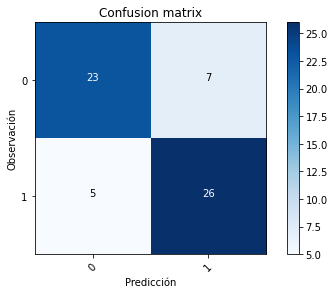

In [48]:

ytrue = test_labels.tolist()
#yhat = yhat.tolist()
confusion_mtx3 = confusion_matrix(ytrue, clasificacion3) 
plot_confusion_matrix(confusion_mtx3, classes = range(2))